In [34]:
import torch
import requests
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as T

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
model = torch.hub.load('facebookresearch/detr','detr_resnet101',pretrained = True)
model.eval().to(device)

Using cache found in /home/alexander/.cache/torch/hub/facebookresearch_detr_main
/home/alexander/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/alexander/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

In [10]:
url = input()

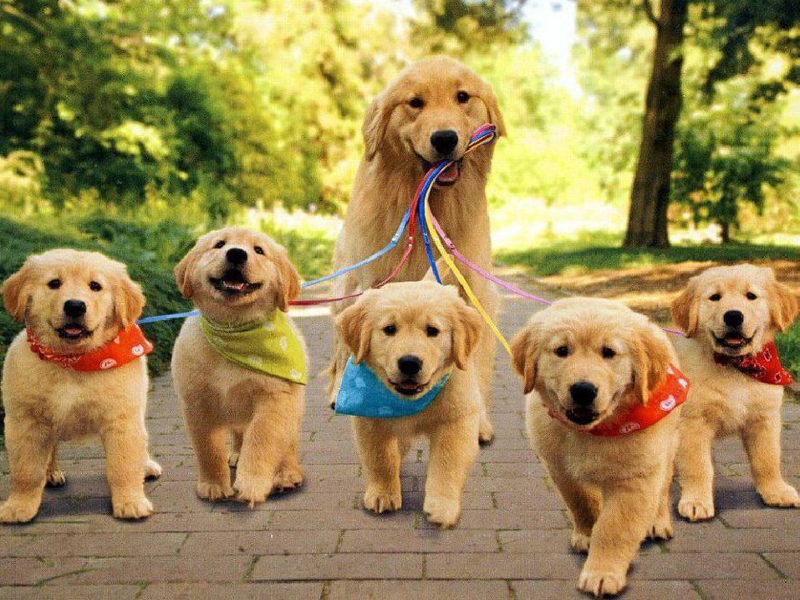

In [17]:
img = Image.open(requests.get(url, stream=True).raw).resize((800,600))
img

In [16]:
# These are the COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Detectron2 uses a different numbering scheme, we build a conversion table
# coco2d2 = {}
# count = 0
# for i, c in enumerate(CLASSES):
#   if c != "N/A":
#     coco2d2[i] = count
#     count+=1

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [24]:
print(transform(img).unsqueeze(0).size())
img_tens = transform(img).unsqueeze(0).to(device)

torch.Size([1, 3, 800, 1066])


In [26]:
with torch.no_grad():
    output = model(img_tens)

output

{'pred_logits': tensor([[[-1.6912e+01, -3.7323e-01, -7.3010e+00,  ..., -1.2905e+01,
           -1.0404e+01,  1.0931e+01],
          [-1.7373e+01, -9.8484e-01, -5.9982e+00,  ..., -1.2573e+01,
           -1.0678e+01,  1.1124e+01],
          [-1.7104e+01, -2.6391e-03, -7.5594e+00,  ..., -1.1999e+01,
           -9.6373e+00,  1.1093e+01],
          ...,
          [-1.7295e+01,  8.4402e-02, -5.1890e+00,  ..., -1.3764e+01,
           -1.0182e+01,  1.0582e+01],
          [-1.6316e+01, -6.2217e-01, -5.7048e+00,  ..., -1.2026e+01,
           -1.0278e+01,  9.7266e+00],
          [-1.6667e+01,  1.0467e+00, -7.4723e+00,  ..., -1.3760e+01,
           -1.1862e+01,  1.0027e+01]]], device='cuda:0'),
 'pred_boxes': tensor([[[0.2994, 0.6141, 0.1887, 0.4651],
          [0.5148, 0.6732, 0.2081, 0.4129],
          [0.2962, 0.5968, 0.1957, 0.4270],
          [0.9149, 0.6821, 0.1699, 0.3672],
          [0.9141, 0.6571, 0.1713, 0.4141],
          [0.7500, 0.7422, 0.2240, 0.4959],
          [0.8234, 0.6456, 0.3

In [44]:
img2 = img.copy()
draw = ImageDraw.Draw(img2)

print(output['pred_boxes'][0].shape)
print(output['pred_logits'][0].argmax(-1))

for logits, box in zip(output['pred_logits'][0], output['pred_boxes'][0]):
    cls = logits.argmax()
    if cls >= len(CLASSES):
        continue
    label = CLASSES[cls]
    box = box.cpu() * torch.Tensor([800,600,800,600])
    x, y, w, h = box
    x0, x1 = x - w//2, x + w//2
    y0, y1 = y - h//2, y + h//2
    draw.rectangle([x0, y0, x1, y1], outline='blue', width=2)
    draw.text((x0+5, y0+2), label, fill='red')

torch.Size([100, 4])
tensor([91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 18, 91, 91, 91, 91, 91, 91, 91], device='cuda:0')


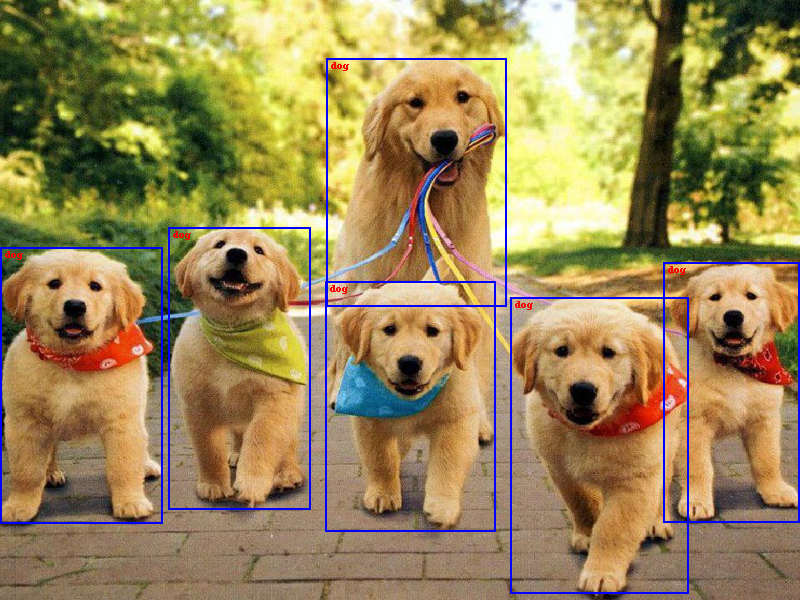

In [45]:
img2